### The goal of this notebook is to perform exploratory data analysis on the season 2 OW2 competitve data

Overwatch 2 is a a hero-based first person shooter which consists of 2 teams composed of 5 players  
competing to complete some objective which ranges from
* Pushing a payload from one end of the map to another before the timer ends, known as Escort
* Capturing an objective that one team is meant to defend and pushing a payload, known as Hybrid
* Competing for an objective, known as Control
* Competing for a payload that either team has push further than the other within the alloted time, known as Push

The competitive mode of the game is mostly played under the conditions that each team will be  
composed of 2 support heroes, 2 damage heroes, and 1 tank hero, this is known as role-lock, the  
less played alternative game mode is known as open queue which allows for any composition mix between  
the three available roles. The skill tiers range from Bronze, Silver, Gold, Platinum, Diamond,  
Masters, and Grandmasters, each containing 5 divisions.

Through analyzing the competitive data for season 2 of Overwatch 2, we seek to understand the state  
of balance of heroes throughout the game, the reason we choose the competitive data as opposed to  
the data from the casual gamemodes, is because we assume that players who choose to play the competitive  
mode are more likely to display a higher level of skill at the game, and have a better understanding  
of the game on a macro level compared to those who play casually.  

Due to this we'd expect that as the ranks progress, certain choices of hero picks for each role will start  
to differ, as players improve the pool of viable heroes will decrease, this is due to players learning  
which heroes provide maximum value given minimum effort. What we mean by effort can be explained by several  
different metrics, though we can't derive it directly from the given data, we can analyze this by using  
our previous knowledge of the heroes, the key metrics are as follows:
* Aim
* Positioning
* Movement
* Gamesense  

The first 3 points are self-explanatory, they encompass what we'd call mechanics,  each hero  
may have individual quirks that act as mechanics special to them, for those not familiar with competitive   
games however the last one may not be familiar to you. Gamesense can be thought of the macro-level  
knowledge that a player has of the game, this will affect how the player understands the flow of a match,  
the useage of their abilities and ultimate abilities, individual interactions between heroes, pathing  
throughout a given map, and timing of engages.


Using our knowledge of the heroes available in the second competitive season and the given  
data, what we seek to understand is the hero balance state, which can be thought of as  
the hierarchy of heroes based on maximizing value given the required effort, of the game.

I want to preface this analysis by stating that I am not a high rated player or even  
one that plays a variety of heroes in the game, I mostly just play Doomfist and hover around  
the ranks divisions of Masters 5 to Masters 2, this most definitely will affect how I perceive  
the game and its balance state.

The dataset has been obtained from kaggle and can be found with the following link,  
https://www.kaggle.com/datasets/mykhailokachan/overwatch-2-statistics,  
it was created by the user Mykhailo Kachan

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
season_2 = pd.read_csv('data/ow2_season_02_FINAL_heroes_stats__2023-03-12.csv')

In [6]:
season_2.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,...,"Jagged Blade Accuracy, %",Carnage Kills / 10min,"Wound Uptime, %",Rampage Kills / 10min,"Focusing Beam Accuracy, %",Focusing Beam Kills / 10min,"Sticky Bomb Accuracy, %",Sticky Bomb Kills / 10min,Duplicate Kills / 10min,Role
0,Ana,All,4.47,10.13,50.44,9.68,4.24,64,2714,8459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Support
1,Ana,Bronze,4.15,5.82,45.17,8.98,4.09,61,2622,7867.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Support
2,Ana,Silver,4.32,7.60,48.71,9.34,4.18,63,2633,8125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Support
3,Ana,Gold,4.58,10.84,49.92,9.74,4.32,63,2713,8512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Support
4,Ana,Platinum,4.67,13.50,50.59,9.87,4.24,62,2782,8667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Support


In [7]:
season_2.duplicated().sum()

0

In [8]:
season_2.isnull().any()

Hero                           False
Skill Tier                     False
KDA Ratio                      False
Pick Rate, %                   False
Win Rate, %                    False
                               ...  
Focusing Beam Kills / 10min     True
Sticky Bomb Accuracy, %         True
Sticky Bomb Kills / 10min       True
Duplicate Kills / 10min         True
Role                           False
Length: 135, dtype: bool

The null values look to be in the hero specific stat columns like Sticky Bomb Accuracy which only  
applies to the hero Echo, so overall there is no empty entries outside of those columns which are hero specific

In [9]:
season_2.dtypes

Hero                            object
Skill Tier                      object
KDA Ratio                      float64
Pick Rate, %                   float64
Win Rate, %                    float64
                                ...   
Focusing Beam Kills / 10min    float64
Sticky Bomb Accuracy, %        float64
Sticky Bomb Kills / 10min      float64
Duplicate Kills / 10min        float64
Role                            object
Length: 135, dtype: object

In [10]:
season_2.shape

(288, 135)

Given that for season 2 there had been 36 heroes in the roster, and a total of 8 ranks considered   
consisting of bronze, silver, gold, platinum, diamond, masters, grandmasters and all which is an  
added value we are looking at in this dataset, we'd expect that there'd be 288 rows.   

The data has already come cleaned, for the sake of our analysis we will be  
omiting hero specific statistics from our dataset and strictly looking at  
hero pick-rate and win-rate across ratings

In [11]:
season_2_df = season_2[['Hero','Skill Tier','Pick Rate, %', 'Win Rate, %','Role']].copy()
season_2_df.head()

,Hero,Skill Tier,"Pick Rate, %","Win Rate, %",Role
0,Ana,All,10.13,50.44,Support
1,Ana,Bronze,5.82,45.17,Support
2,Ana,Silver,7.60,48.71,Support
3,Ana,Gold,10.84,49.92,Support
4,Ana,Platinum,13.50,50.59,Support


Let's split our season 1 dataset into each of the three roles, Tank, DPS, and Support

For the sake of our analysis we'll be omitting the any rows containing the value  
All for rank

In [12]:
tanks_s2_df = season_2_df[season_2_df['Role'] == 'Tank'].copy().drop(columns=['Role'],axis=1)
supports_s2_df = season_2_df[season_2_df['Role'] == 'Support'].copy().drop(columns=['Role'],axis=1)
dps_s2_df = season_2_df[season_2_df['Role'] == 'Damage'].copy().drop(columns=['Role'],axis=1)


tanks_s2_df = tanks_s2_df[~(tanks_s2_df['Skill Tier'] == 'All')]
supports_s2_df = supports_s2_df[~(supports_s2_df['Skill Tier'] == 'All')]
dps_s2_df = dps_s2_df[~(dps_s2_df['Skill Tier'] == 'All')]

In [13]:
tanks_s2_df.head()

,Hero,Skill Tier,"Pick Rate, %","Win Rate, %"
49,Reinhardt,Bronze,2.10,46.07
50,Reinhardt,Silver,1.95,48.55
51,Reinhardt,Gold,2.76,51.02
52,Reinhardt,Platinum,3.02,50.99
53,Reinhardt,Diamond,3.12,51.99


In [14]:
supports_s2_df.head()

,Hero,Skill Tier,"Pick Rate, %","Win Rate, %"
1,Ana,Bronze,5.82,45.17
2,Ana,Silver,7.60,48.71
3,Ana,Gold,10.84,49.92
4,Ana,Platinum,13.50,50.59
5,Ana,Diamond,12.91,50.56


In [15]:
dps_s2_df.head()

,Hero,Skill Tier,"Pick Rate, %","Win Rate, %"
25,Genji,Bronze,1.66,45.74
26,Genji,Silver,1.48,45.34
27,Genji,Gold,2.84,47.71
28,Genji,Platinum,4.63,51.76
29,Genji,Diamond,4.16,50.40


Let's begin by analyzing the tanks, we'll take a look at how pickrate is 
distributed accross ranks for each tank

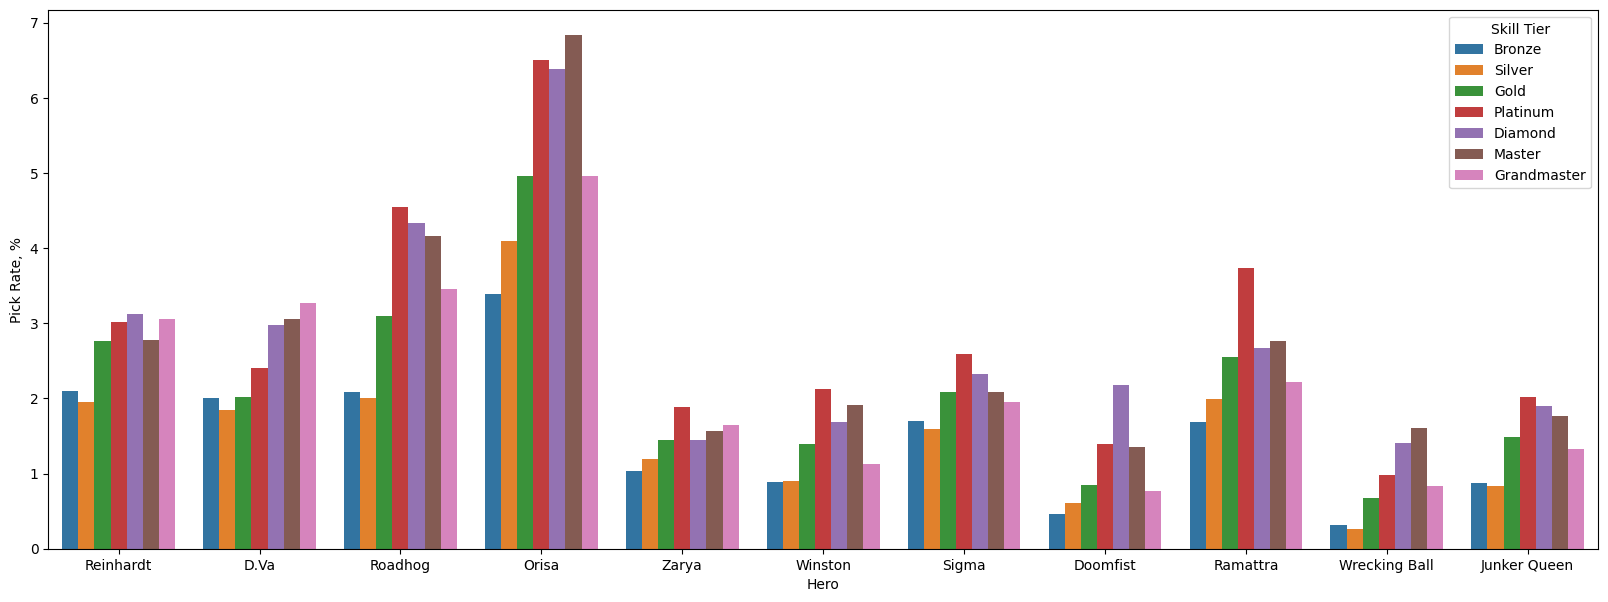

In [16]:
plt.figure(figsize=(20,7))
sns.barplot(data=tanks_s2_df,
            x='Hero',
            y='Pick Rate, %',
            hue = 'Skill Tier')
plt.show()

We see that the most popular hero throughout all 7 skill tiers is Orisa, with her  
pick-rate being significantly greater than that of all the other tanks in each of the  
corresponding tiers, and Roadhog being the second most picked tank accross each tier,  
being closely tied with Ramattra in the Platinum skill tier

Given that her pickrate is consistenstly the higest amongst all 7 skill tiers, we'd expect that the value  
the hero provides for her team to be greater than that of all the other tanks, and the effort required to  
create that value to be comparitively low.

Orisa's kit is composed of 3 abilities, Fortify which provides a 40% damage reduction affect and makes her immune  
to headshots, which would usually result in twice the damage being taken, Energy Javelin which stuns the enemy it impales for .2 seconds,  
if the enemy makes impact with a wall at the time of being impaled an additional .3 seconds is added to the stun effct, and  
Javelin Spin which negates damage from projectile, hitscan, and melee attacks while increasing her movement speed by 50%, and  
displacing enemies who she comes in contact with. The cooldown timers for each ability is 12, 6, and 7 seconds respectively, meaning that  
if a player learns to rotate her cooldowns they can always have atleast 1 ability off cooldown in each teamfight,  
Orisa's ultimate Terra Surge applies a slow effect within a 9 meter radius and scales in damage from 60-500 dmg, the ultimate  
also provides Orisa with Fortify for its duration. Her primary fire is a projectile that relies on a resource meter,  
if held for too long the player will have to wait for 2.5 seconds, it has a damage dropoff range from 15-25 meters.  

From looking at Orisa's kit we can deduce the potential key reasons as to why here pick rate is significantly greater than  
each of the other tanks across all skill tiers. We'd expect that her survivablility is the key reason why she has a high pick-rate  
in lower skill ratings, as players tend to have worse aim they will focus on the largest target, which is the tank,  
meaning that they spend their time trying to eliminate Orisa from the fight, but given her Fortify and Javelin Spin and large base  
health and armour pool, it is not likely for her to die.  

In higher skill ratings her survivability will definitely assist, but as players learn to rotate her cooldowns better  
the low cooldown timers on each of her abilities and her CC abilites that allow her to deny engages are most likely  
the key reasons as to why she is picked more, her survivability is more likely to be used as a resource to take more space  
on a map, causing enemies to focus her more and allowing the rest of her team angles to engage on the enemy.  

Given her consistently high pick-rate over various skill tiers, we may be inclined to conclude that the overall  
effort required to provide value with Orisa is comparitively low, as is the case with Roadhog to a lesser degree, who  
is also a hero that relies heavily on his CC abilitiy and survivability given his health regeneration/damage reduction ability.    

In a healthy competitive environment we'd expect that a heroes value and effort would be positively correlated, as such  
players in lower skill ratings would pick heroes that require less effort and inexchange produce less value  
simply because they possess less mechanical skill and gamesense, and as the skill ratings increase the heroes that demand  
more of those skills would rise in pick-rate, in addition to this we'd expect that a healthy competitive environment  
would allow for a variety of heroes to be viable, which would be refelcted in their pick-rates. 
  
We see that with how the pick-rate is distributed in season 2 for tanks that there was clearly a  
major imbalance in power between tanks, given that one has a consistent pick-rate regardless  
of individual player skill.  

Let's move on to seeing the winrate for each tank across the ranks

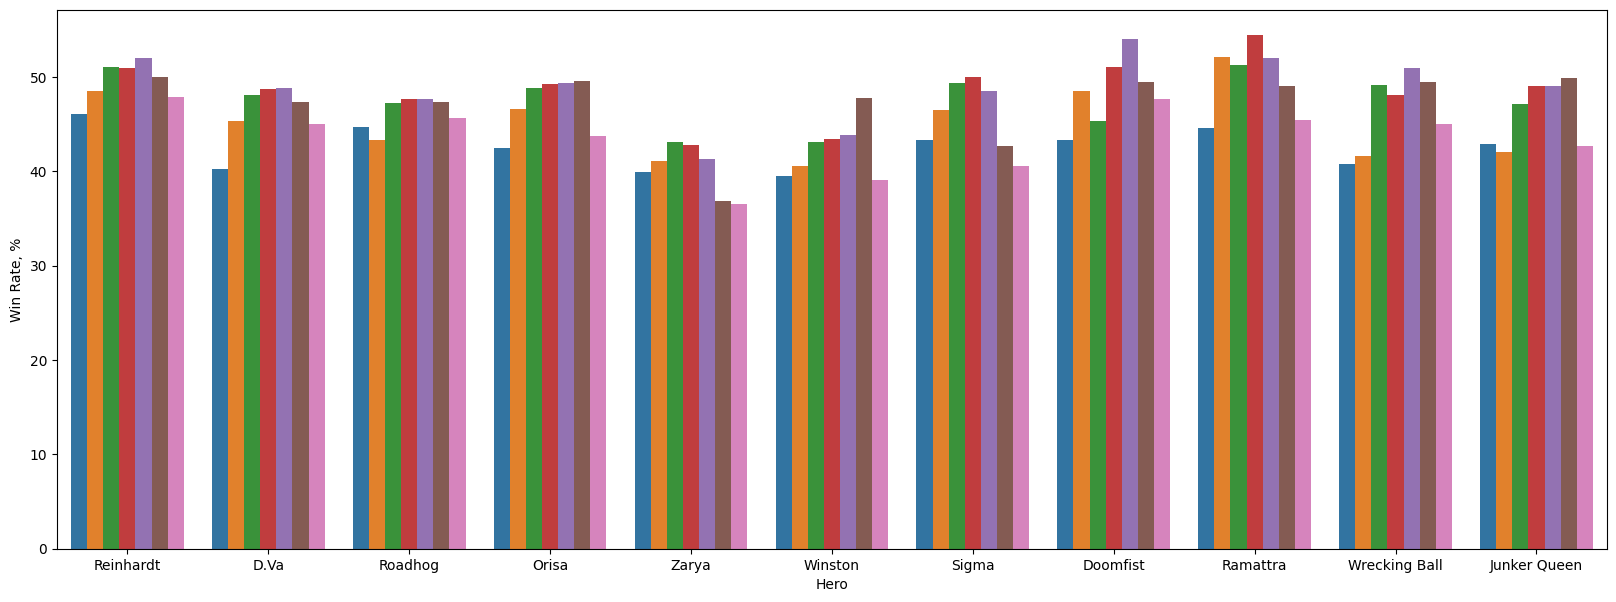

In [18]:
plt.figure(figsize=(20,7))
ax = sns.barplot(data=tanks_s2_df,
            x='Hero',
            y='Win Rate, %',
            hue = 'Skill Tier')
ax.legend_.remove()
plt.show()

The win-rates are more or less equivalent, with the lesser picked heroes having a higher  
win-rate across the ratings. One explanation for this is that given that the pick-rate is  
much lower for these heroes, we don't have a sufficient amount of data to come to a conclusion  
on the overall win-rate across each skill tier, since outliers may be skewing the overall range.

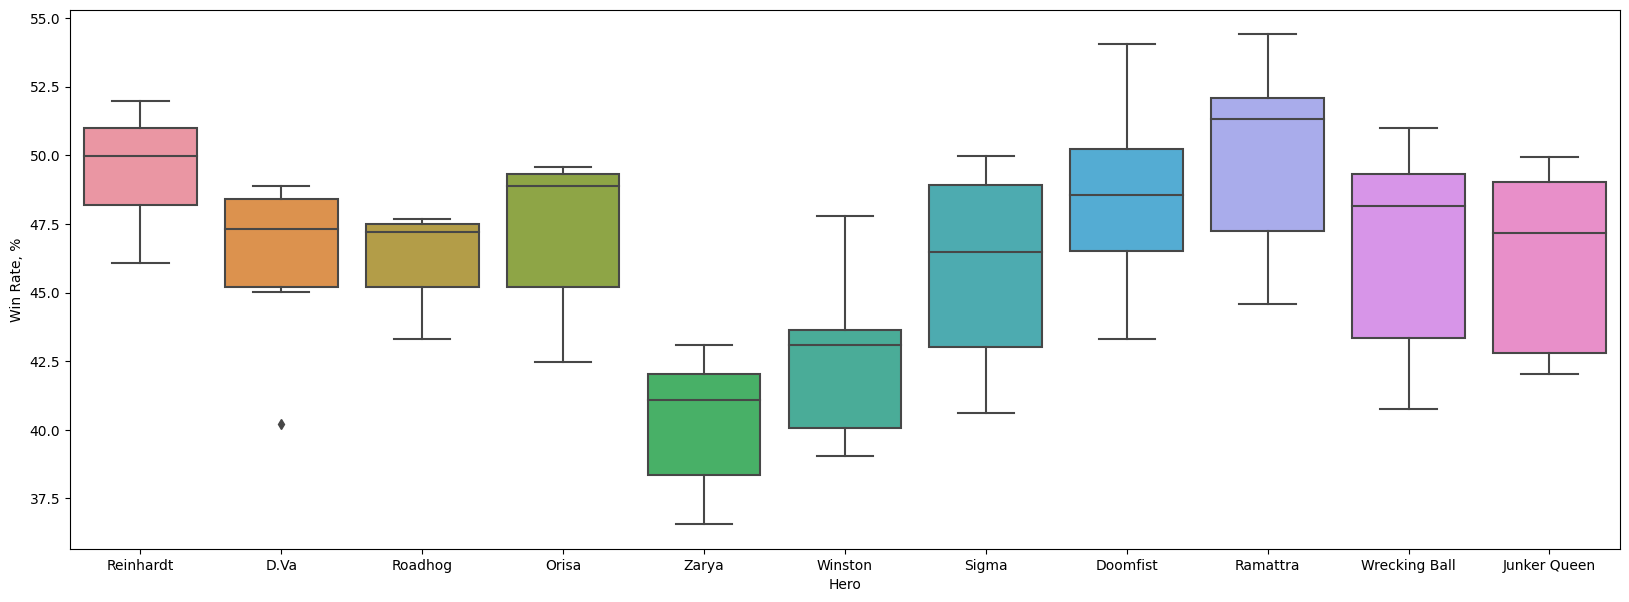

In [19]:
plt.figure(figsize=(20,7))
sns.boxplot(data=tanks_s2_df,
            x='Hero',
            y='Win Rate, %')
plt.show()

In [20]:
tank_stats_wr_df = pd.DataFrame()
tank_stats_pr_df = pd.DataFrame()

for hero in tanks_s2_df['Hero'].unique():
    tank_stats_wr_df[hero] = tanks_s2_df[tanks_s2_df['Hero'] == hero]['Win Rate, %'].describe()
    tank_stats_pr_df[hero] = tanks_s2_df[tanks_s2_df['Hero'] == hero]['Pick Rate, %'].describe()

tank_stats_wr_df

,Reinhardt,D.Va,Roadhog,Orisa,Zarya,Winston,Sigma,Doomfist,Ramattra,Wrecking Ball,Junker Queen
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,49.495714,46.227143,46.221429,47.132857,40.222857,42.475714,45.857143,48.488571,49.845714,46.454286,46.110000
std,2.094738,3.057966,1.711836,2.944649,2.639379,3.037279,3.664231,3.553240,3.667160,4.025911,3.437383
min,46.070000,40.220000,43.300000,42.470000,36.560000,39.060000,40.600000,43.310000,44.590000,40.770000,42.030000
25%,48.205000,45.195000,45.185000,45.185000,38.365000,40.065000,43.030000,46.505000,47.230000,43.335000,42.815000
50%,49.990000,47.300000,47.220000,48.870000,41.090000,43.080000,46.490000,48.560000,51.320000,48.140000,47.160000
75%,51.005000,48.400000,47.485000,49.325000,42.040000,43.630000,48.930000,50.235000,52.070000,49.310000,49.015000
max,51.990000,48.880000,47.690000,49.570000,43.100000,47.800000,49.990000,54.070000,54.410000,50.980000,49.920000


In [21]:
tank_stats_pr_df

,Reinhardt,D.Va,Roadhog,Orisa,Zarya,Winston,Sigma,Doomfist,Ramattra,Wrecking Ball,Junker Queen
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.682857,2.514286,3.384286,5.301429,1.458571,1.434286,2.045714,1.087143,2.517143,0.865714,1.458571
std,0.471123,0.582605,1.043342,1.309624,0.281510,0.491930,0.344231,0.596230,0.664673,0.510518,0.475024
min,1.950000,1.850000,2.010000,3.390000,1.030000,0.890000,1.590000,0.460000,1.680000,0.260000,0.830000
25%,2.430000,2.015000,2.590000,4.525000,1.320000,1.015000,1.825000,0.690000,2.105000,0.490000,1.105000
50%,2.780000,2.410000,3.460000,4.960000,1.450000,1.390000,2.080000,0.850000,2.550000,0.830000,1.480000
75%,3.035000,3.020000,4.245000,6.440000,1.605000,1.800000,2.205000,1.370000,2.720000,1.195000,1.835000
max,3.120000,3.270000,4.550000,6.830000,1.880000,2.130000,2.590000,2.180000,3.740000,1.600000,2.020000


We see that is is the case that the tanks with the lowest pick-rates (Doomfist, Winston, Wrecking Ball, Junker Queen)  
tend to have the greatest range of win-rates, though this does not apply to Ramattra who is an outlier  
when it comes to this trend.

The conclusions we've come to with regards to tank balance through analyzing pick-rates  
and win-rates for each tank are not complete, the data does not tell the entire story of the  
state of a hero in the game, it gives us some idea but does not allow us to understand essential  
ideas like individual interactions between heroes, counter-play to abilites, and counter-play  
to hero ultimates.

It's also important to understand that since Overwatch 2 is a team-based game that hero pick-rate  
may point towards a general team composition being dominant over individual heroes being overpowered,  
this point is important to remember throughout our analysis as to understand the balance of a hero we  
need to take into account how they synergize with the rest of their team.

Let's now move onto analyzing the support heroes, beginning with their pick-rates

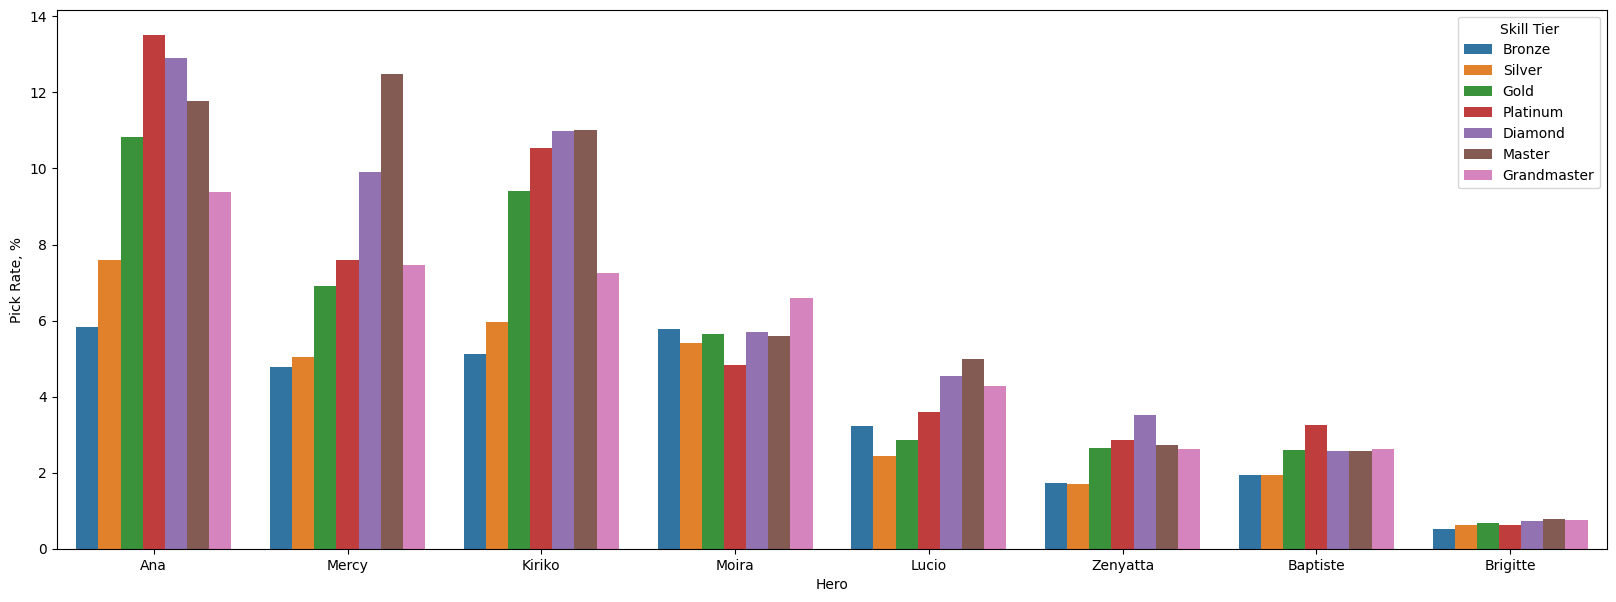

In [22]:
plt.figure(figsize=(20,7))
sns.barplot(data=supports_s2_df,
            x='Hero',
            y='Pick Rate, %',
            hue = 'Skill Tier')
plt.show()

We see that Ana, Mercy, and Kiriko are all very popular picks throughout the ranks, with Moira having a consistent  
pick-rate throughout the ranks, and having a significant proportion of the pick rate in ranks platinum and below.  

In lower ratings we'd expect a little more randomness in the pick-rate, and as we see there is some of that present  
seeing as Moira is being picked somewhat below Platinum, however given the distribution of the pick-rates for the top 3  
support heroes in the lower ratings we can't really make any assumptions about the state of balance, it may reflect  
that those 3 heroes are simply the most liked by the auidence, what we can see however is past Diamond the pick-rate  
is definitely comprable for the 3, lets take a look at each hero individually.

Mercy's kit provides utility for the team mainly through her damage amplification ability, as you climb in rank  
Mercy players are expected to primarily use their utility to assist the DPS players in securing kills, her healing  
is viewed as secondary. Although this is a powerful ability it is completely contingent upon the level of skill  
of their teammates, making it difficult to control the matches on her own.

Ana's is capable of outputting both a great amount of healing and damage, along with her kit containing a CC ability  
and a nade that is capable of amplifying heals on teammates it comes in contact with, and denying heals on enemies for  
a short duration. The caveat is that it is difficult to land her CC ability, meaning that she's susceptible to flanks  
and is not very survivable if caught out of position. Overall she can have a strong effect on a match, but this is   
contingent upon the individual players mechanics and gamesense, which may explain why we see her pick-rate rise   
as the skill tier rises.

Kiriko is capable of dealing out damage, but as is seen in high ranking matches she is primarily used for her utility  
and ultimate. Kiriko is capable of cleansing debuffs and providing temporary immortality to players with her nade ability,  
teleporting to teammates within 35 meters which also cleanes debuffs and provides temporary immortality for herself,  
she provides a significant output of healing, and her ultimate increases movement speed, decreases cooldown timers, increases  
fire rate, and decreases reload time for teammates within its casting range. We see that her kit is significantly more  
powerful than the other 2, although it is also contigent upon player skill, we may be inclined to conclude  
that she is in an overpowered state in season 2.

Let's move onto analyzing the win-rates

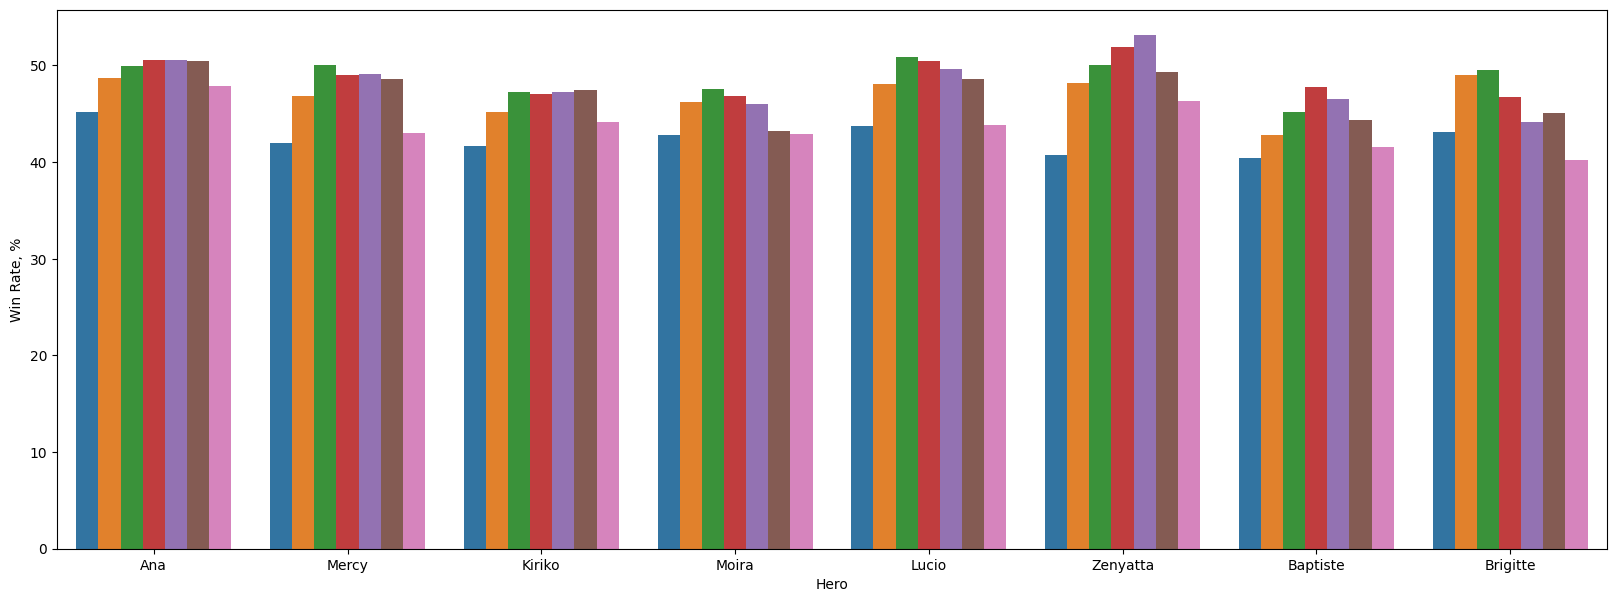

In [23]:
plt.figure(figsize=(20,7))
ax = sns.barplot(data=supports_s2_df,
            x='Hero',
            y='Win Rate, %',
            hue = 'Skill Tier')
ax.legend_.remove()
plt.show()

We'll go through the same process we did with the tanks, generating a boxplot and looking at the descriptive statistics

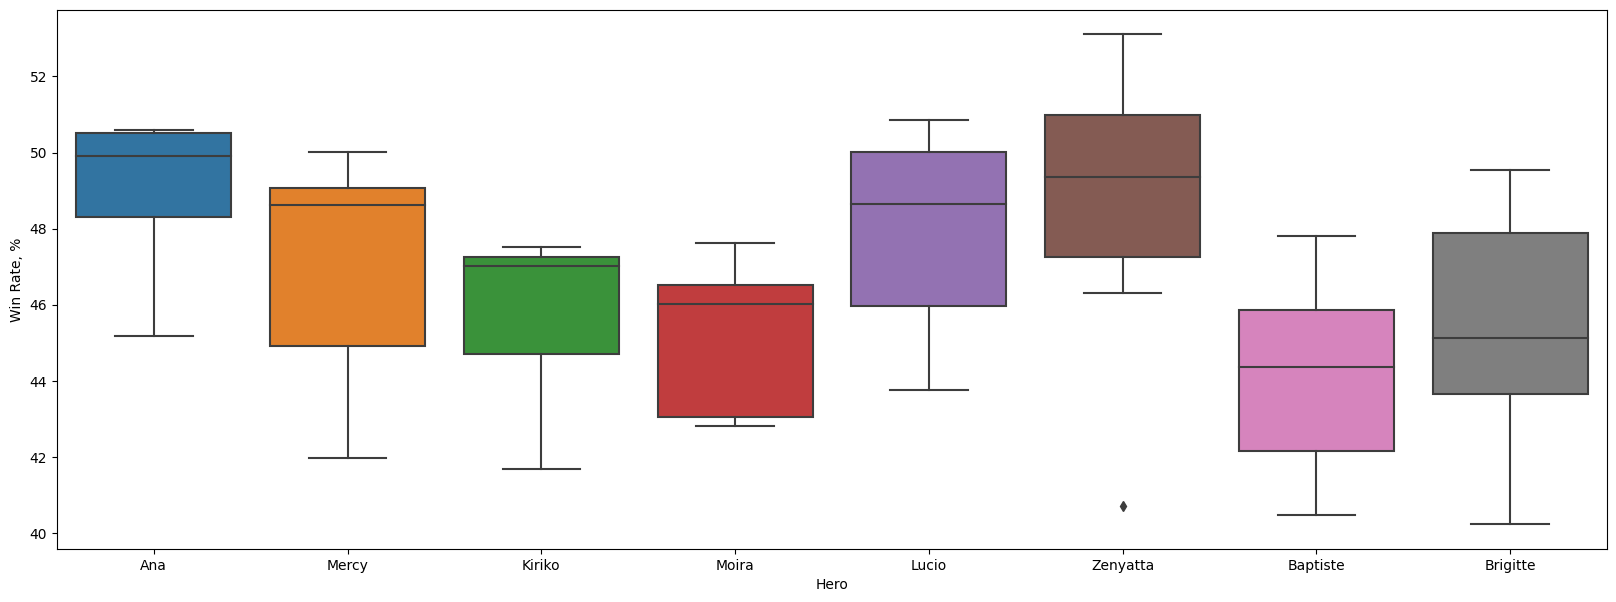

In [24]:
plt.figure(figsize=(20,7))
sns.boxplot(data=supports_s2_df,
            x='Hero',
            y='Win Rate, %')
plt.show()

In [25]:
supports_stats_wr_df = pd.DataFrame()
supports_stats_pr_df = pd.DataFrame()

for hero in supports_s2_df['Hero'].unique():
    supports_stats_wr_df[hero] = supports_s2_df[supports_s2_df['Hero'] == hero]['Win Rate, %'].describe()
    supports_stats_pr_df[hero] = supports_s2_df[supports_s2_df['Hero'] == hero]['Pick Rate, %'].describe()

supports_stats_wr_df

,Ana,Mercy,Kiriko,Moira,Lucio,Zenyatta,Baptiste,Brigitte
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000
mean,49.041429,46.940000,45.737143,45.084286,47.887143,48.521429,44.10000,45.420000
std,1.997293,3.212367,2.180846,2.037587,2.945430,4.117076,2.65995,3.308338
min,45.170000,41.960000,41.690000,42.820000,43.750000,40.700000,40.46000,40.230000
25%,48.295000,44.915000,44.700000,43.055000,45.975000,47.255000,42.16500,43.645000
50%,49.920000,48.620000,47.030000,46.020000,48.640000,49.360000,44.37000,45.130000
75%,50.510000,49.075000,47.265000,46.515000,50.010000,50.985000,45.86500,47.880000
max,50.590000,50.020000,47.510000,47.610000,50.850000,53.110000,47.81000,49.530000


In [26]:
supports_stats_pr_df

,Ana,Mercy,Kiriko,Moira,Lucio,Zenyatta,Baptiste,Brigitte
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,10.258571,7.741429,8.611429,5.647143,3.705714,2.542857,2.495714,0.671429
std,2.820103,2.708323,2.477199,0.522485,0.931806,0.642436,0.453316,0.095469
min,5.820000,4.780000,5.120000,4.830000,2.450000,1.690000,1.930000,0.510000
25%,8.485000,5.980000,6.605000,5.500000,3.045000,2.175000,2.250000,0.625000
50%,10.840000,7.470000,9.420000,5.640000,3.590000,2.660000,2.580000,0.670000
75%,12.340000,8.745000,10.760000,5.735000,4.410000,2.795000,2.605000,0.740000
max,13.500000,12.490000,11.010000,6.590000,4.990000,3.510000,3.250000,0.790000


For the supports it is difficult to draw any conclusions, we can infer based of the  
pick-rates but as was discussed previously it is not sufficient in determing individual  
hero balance, atmost we can state that the top 3 support hero choices fit  
better into the overall meta composition in the game during season 2,  
aside from Mercy, they all take a significant amount of mechanical skill  
and gamesense to play so we may be inclined to conclude that they  
are in somewhat of a balanced state, atmost they may be somewhat overtuned.

For now we will move onto taking a look at the damage heroes,  
since the game is team-based it may give us a better idea  
as to what the state of the game balance is by looking at it holistically.

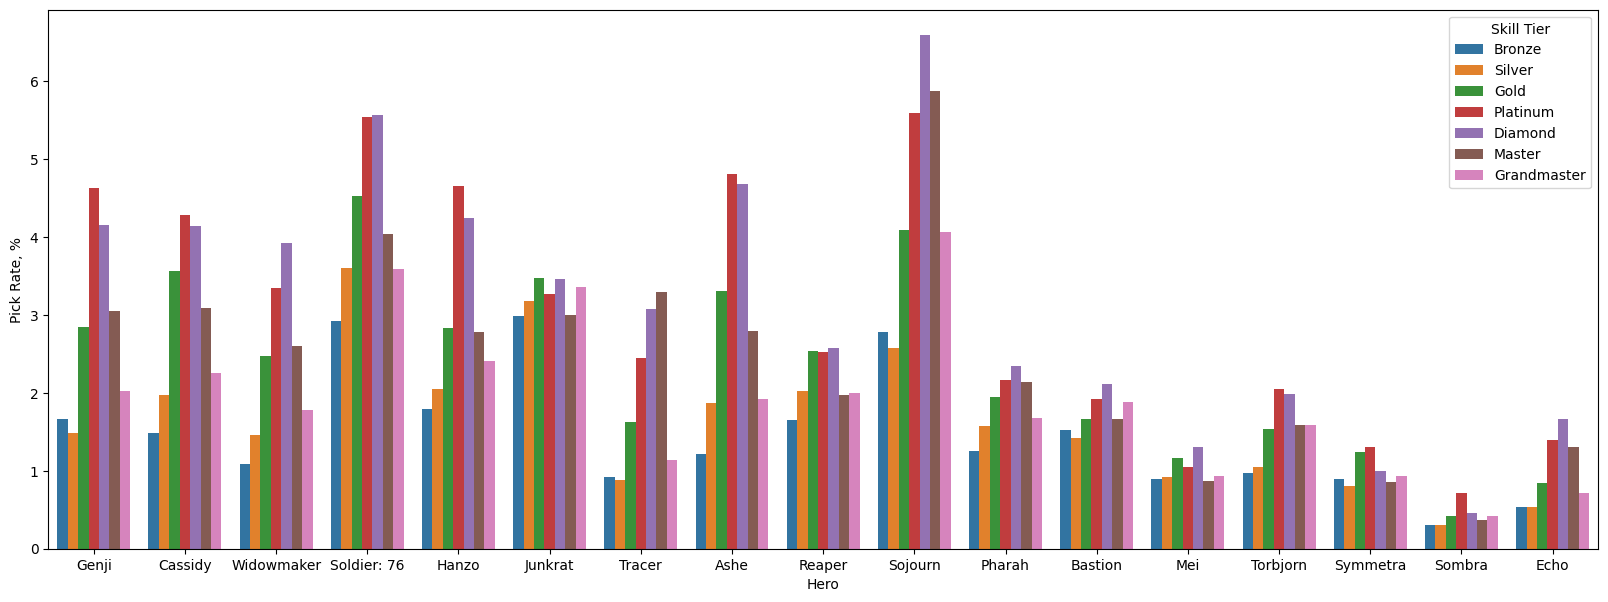

In [27]:
plt.figure(figsize=(20,7))
sns.barplot(data=dps_s2_df,
            x='Hero',
            y='Pick Rate, %',
            hue = 'Skill Tier')
plt.show()

We can already see a major discrepency in hero picks amongst the ranks, it seems to be the case that Sojourn  
is by far the most picked regardless of skill tier, after her the next top picks are Ashe and Soldier 76,  
it seems to be the case that as skill tiers increase hitscan heroes become most dominant, this was to be  
expected as Mercy pairs best with hitscan heroes, in particular damage boosting Sojourn can gaurantee kills  
since she was capable of one-shotting a majority of the heroes in season 2 with damage boost.

We see that throughout the skill tiers that Genji is a hero that has a non-negligible pick-rate,  
but the general sentiment towards Genji during season 2 was that he was a weak hero due to receiving nerfs  
in season 1, and the change of the DPS passive ability, which originally would grant increased movement speed,  
fire-rate, and reload rate, but was changed to only increasing reload speed, mainly benefitting hitscan heroes.  
Given that the concensus was that he was weak during this season his high pick-rate is most likely due to his  
popularity amongst fans, similar to Mercy and Ana.

Let's move on to analyzing the win-rates

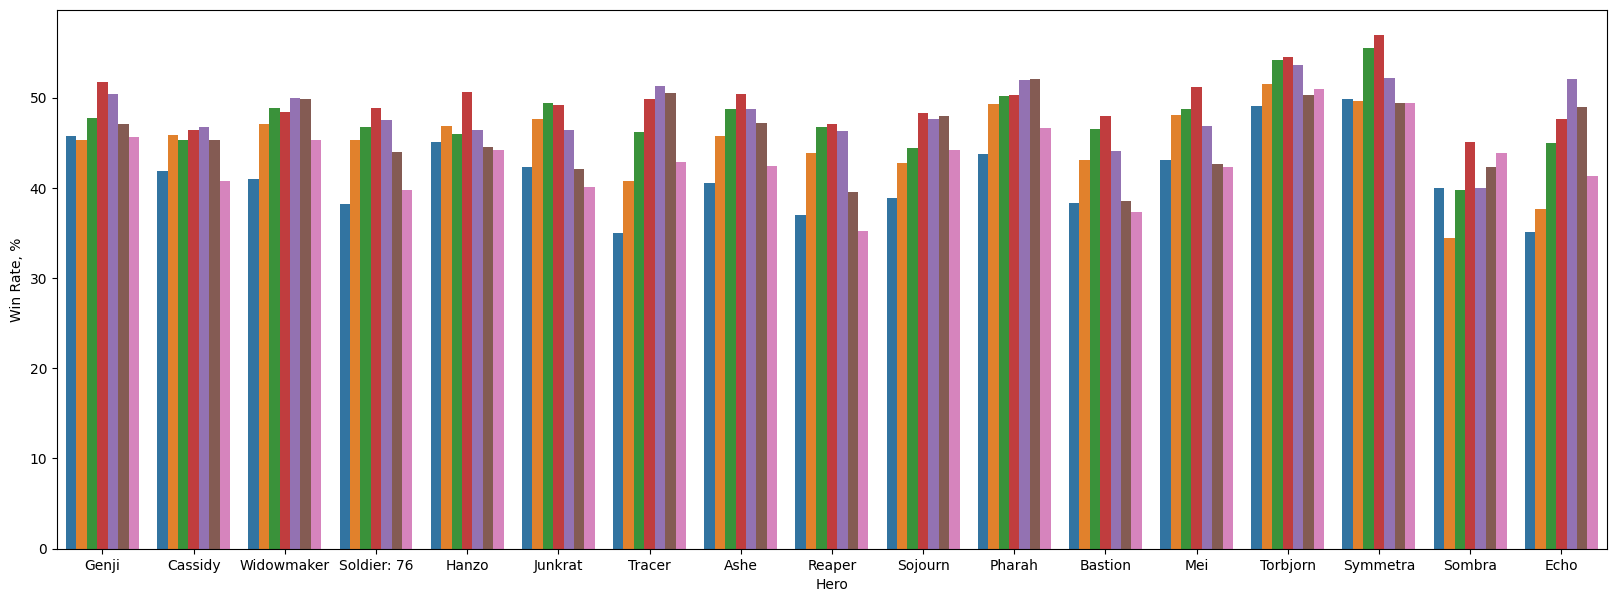

In [28]:
plt.figure(figsize=(20,7))
ax = sns.barplot(data=dps_s2_df,
            x='Hero',
            y='Win Rate, %',
            hue = 'Skill Tier')
ax.legend_.remove()
plt.show()

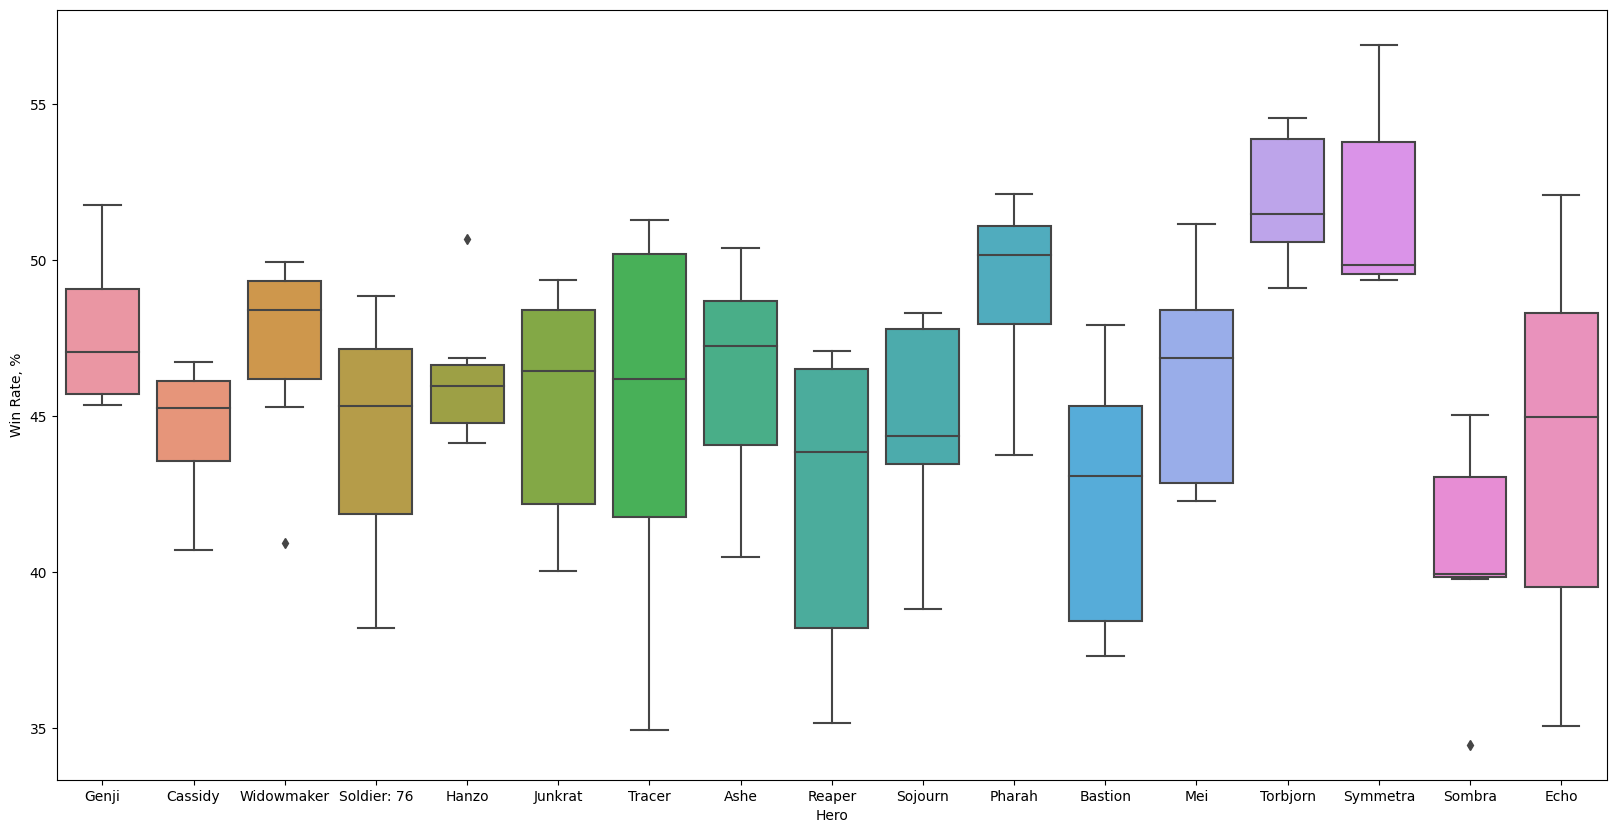

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=dps_s2_df,
            x='Hero',
            y='Win Rate, %')
plt.show()

We see a similar trend across all 3 roles that we would expect given the pick-rates,  
the heroes with the lowest pick-rates have the widest range in win-rate

We now move onto our conclusions about the balance state of season 2

#### Conclusion

#### Insights Gained
##### Tanks  
For the tanks here are the key take-aways  
* There was a major imbalance in pick-rate across all ranks, the tanks primarily picked were Roadhog and Orisa
* The top tanks have CC abilities apart of their kits, and have high survivability
* Those least picked we're mobile tanks with low survivability, namely the tanks considered "Dive" tanks
* The conclusion we draw from this is that tank was in an imbalanced state with a bias towards high survivability and CC dense kits  

##### Supports  
For the supports here are the key take-aways  
* The pick-rate was consistent across all ranks with Mercy, Ana, and Kiriko being top picks across all ranks
* Moira was the only other noteable support by pick-rate in skill tiers including and below Platinum
* Each of the top 3 support picks have utility apart of their kits, with Mercy's being strongly dependent 
  on the rest of her team given her inability to make plays on her own
* Ana and Kiriko being top picks somewhat conflicts with eachother given that Kiriko is capable of shutting down Ana's utility
* Ana, though strong, was likely a top pick given her popularity amongst the fanbase
* It's very likely the case that Kiriko was a top pick given her utility, which enables heroes like Roadhog by improvig his survivability against Ana

##### DPS  
For the DPS here are the key take-aways  
* The pick-rate across all skill tiers was clearly biased towards hitscan heroes
* Given that Mercy pairs well with hitscan heroes, enabling heroes like Sojourn to one-shot most heroes, it makes sense that hitscan was primarily picked
* The least picked heroes were flex DPS heroes, in particular Mei and Sombra, both of which rely heavily on their utility as a means of making plays

The conclusions we draw from our key take-aways is that season 2 was in an unbalanced state,  
with the meta being biased towards CC reliant and highly survivable tanks, Kiriko's cleanse ability,  
and Mercy's damage boost elevating the power of hitscan heroes, primarily Sojourn  

The heroes that had been the weakest throughout the season were those who were not  
survivable, relied mostly on their movement abilities, had no CC or weak CC abilities in  
comparison to the other heroes, and those that did not pair well with Mercy or Kiriko